In [108]:
# !pip install konlpy
# !pip install koreanize_matplotlib

In [109]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

In [110]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', 60) # None으로 설정하면 모든 내용을 출력 default:60

In [111]:
pd.set_option?

Signature:   pd.set_option(*args, **kwds) -> 'T'
Type:        CallableDynamicDoc
String form: <pandas._config.config.CallableDynamicDoc object at 0x0000022AFDE9EB70>
File:        d:\kdt_2\anaconda3\lib\site-packages\pandas\_config\config.py
Docstring:  
set_option(pat, value)

Sets the value of the specified option.

Available options:

- compute.[use_bottleneck, use_numba, use_numexpr]
- display.[chop_threshold, colheader_justify, date_dayfirst, date_yearfirst,
  encoding, expand_frame_repr, float_format]
- display.html.[border, table_schema, use_mathjax]
- display.[large_repr, max_categories, max_columns, max_colwidth, max_dir_items,
  max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
  min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
  show_dimensions]
- display.unicode.[ambiguous_as_wide, east_asian_width]
- display.[width]
- future.[infer_string, no_silent_downcasting]
- io.excel.ods.[reader, writer]
- io.excel.xls.[reader]
- io.excel

In [112]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [113]:
# 정규표현식
import re

In [114]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [115]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2024-12-30 14:16:40.529914


'2024-12-30'

In [116]:
df = pd.read_csv(f'news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수,제목_명사,내용_명사
0,매일경제,"“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”",\n 사진 확대 현대제철 CI. [사진 = 현대제철] NH투자증권은 30일 현대제철에...,2024-12-30 08:29:19,45,795,11,184,국내 정치 원 달러 환율 급등 현대제철 수익 회복 폭 것,사진 확대 현대 제철 사진 현대 제철 투자 증권 제철 대해 국내 정치 불확실 심화 내년 전망 것 라며...


#### CountVectorizer
 - 텍스트 데이터 전처리 도구로, 주로 텍스트 데이터를 수치형 데이터로 변환하는 데 사용
 - 단어의 빈도를 계산하여 문서-단어 행렬(Document-Term Matrix)을 생성

1. 토큰화(Tokenization):
    - 기본적으로 CountVectorizer는 공백을 기준으로 단어를 나눔
2. 정규 표현식 사용:
    - token_pattern 매개변수를 사용하여 정규 표현식을 정의할 수 있음. 이를 통해 특정 패턴에 맞는 단어만 추출
3. 불용어 제거:
    - stop_words 매개변수를 사용하여 불용어(의미가 없는 단어)를 제거
4. n-그램(n-grams):
    - ngram_range 매개변수를 사용하여 단어의 n-그램을 생성할 수 있음. 예를 들어, ngram_range=(1, 2)로 설정하면 단어와 2-그램(두 단어 조합)을 모두 포함
5. 소문자 변환:
     - 기본적으로 CountVectorizer는 모든 단어를 소문자로 변환하여 대소문자를 구분하지 않음

In [117]:
corpus = df['제목'] #.head(10)
corpus

0      “국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”
1     이지영 서울의대 신경과 교수 “GV1001 PSP 2a 임상 데이터 상당히 고무적”
2                   “이마트, G마켓·알리익스프레스 출자로 사업 시너지 모색”
3            “여행·항공株 어쩌나”…연말 덮친 탄핵·항공 참사에 투자심리 추락 위기
4                        미장에 푹빠진 서학개미, 올해 375조원 사들였다
                           ...                      
95            '오징어 게임 2' 기대감 너무 컸나…아티스트스튜디오 등 관련주 폭락
96                 환율 한때 1486원·코스피 2400 붕괴…꽁꽁 언 투자심리
97                         KODEX 200액티브 순자산 2000억 돌파
98                     꽁꽁 언 투자심리…코스피 거래대금, 연일 최저치 경신
99                       "AI 열풍 이어 받는다"…양자컴 관련주 '들썩'
Name: 제목, Length: 100, dtype: object

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide

#### 매개 변수
- analyzer : 단어, 문자 단위의 벡터화 방법 정의
- ngram_range : BOW 단위 수 (1, 3) 이라면 1개~3개까지 토큰을 묶어서 벡터화
- max_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 높은 용어(말뭉치 관련 불용어)는 제외 (기본값=1.0)
    - max_df = 0.90 : 문서의 90% 초과에 나타나는 단어 제외
    - max_df = 10 : 10개 초과의 문서에 나타나는 단어 제외
- min_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 낮은 용어는 제외합니다. 컷오프라고도 합니다.(기본값=1.0)
    - min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 제외
    - min_df = 10 : 문서에 10개 미만으로 나타나는 단어 제외
- stop_words : 불용어 정의
- max_features : 벡터라이저가 학습할 어휘의 양을 제한, corpus중 빈도수가 가장 높은 순으로 해당 개수만큼만 추출

In [120]:
cvect = CountVectorizer(max_df=5,min_df=2,ngram_range=(1,2))

#### fit, transform, fit_transfrom의 차이점
- fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 만듦
- transform(): 문서를 문서 용어 매트릭스로 변환됨. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경됨
- fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환함. fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현됨

In [121]:
X = cvect.fit_transform(corpus)
X

<100x113 sparse matrix of type '<class 'numpy.int64'>'
	with 275 stored elements in Compressed Sparse Row format>

In [122]:
# 단어사전 확인
# 단어사전은 {"단어":인덱스번호}
cvect.vocabulary_

{'국내': 23,
 '환율': 111,
 '급등': 27,
 '현대제철': 110,
 '수익성': 57,
 '사업': 52,
 '시너지': 59,
 '연말': 70,
 '참사에': 95,
 '투자심리': 102,
 '서학개미': 55,
 '올해': 73,
 '테슬라': 100,
 '실스크': 61,
 '한달새': 108,
 '2100': 4,
 '폭등': 105,
 '실스크 한달새': 62,
 '한달새 2100': 109,
 '2100 폭등': 5,
 '내년': 37,
 '4분기': 10,
 '증발': 91,
 '탄핵에': 99,
 '참사까지': 94,
 'k항공': 13,
 '제주항공': 82,
 '비극': 50,
 '반등': 47,
 '기대': 29,
 '올해만': 74,
 '아직': 65,
 '기업': 31,
 '반도체': 46,
 '나홀로': 36,
 '삼성전자': 54,
 '급락': 28,
 '이마트 주가': 79,
 '주가 급락': 87,
 '주가는': 88,
 '기대감': 30,
 '1500원': 0,
 '원화값': 76,
 '무슨': 44,
 '단독': 38,
 '경제': 21,
 '폭락': 106,
 '한국': 107,
 '거래': 20,
 '전망': 81,
 '트럼프': 103,
 '사모시장': 51,
 '투자': 101,
 '알리': 67,
 '지마켓': 93,
 '2기': 8,
 '글로벌': 25,
 '트럼프 2기': 104,
 '2400': 6,
 '코스피 2400': 98,
 '조직개편': 85,
 '실시': 63,
 '강화': 17,
 '조직개편 실시': 86,
 '주식': 89,
 '초고수는': 96,
 '지금': 92,
 '주식 초고수는': 90,
 '초고수는 지금': 97,
 '연금': 69,
 'etf': 12,
 '매수': 41,
 '원자재': 75,
 '산타랠리': 53,
 '2400선': 7,
 '순자산': 58,
 '돌파': 39,
 '관련주': 22,
 '부진': 48,
 '목표가': 42,
 'nh': 14,
 '

In [123]:
X.toarray()

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [124]:
cvect.get_feature_names_out()

array(['1500원', '2024', '2025', '2025 재테크', '2100', '2100 폭등', '2400',
       '2400선', '2기', '33', '4분기', '4분기 실적', 'etf', 'k항공', 'nh', '主食이',
       '主食이 주식', '강화', '개미들', '개미들 환호', '거래', '경제', '관련주', '국내', '국장',
       '글로벌', '금융주', '급등', '급락', '기대', '기대감', '기업', '꽁꽁', '꽁꽁 투자심리',
       '나스닥', '나스닥 33', '나홀로', '내년', '단독', '돌파', '마켓pro', '매수', '목표가',
       '목표가 nh', '무슨', '밑돌', '반도체', '반등', '부진', '비결', '비극', '사모시장', '사업',
       '산타랠리', '삼성전자', '서학개미', '수익률', '수익성', '순자산', '시너지', '시총', '실스크',
       '실스크 한달새', '실시', '실적', '아직', '악재', '알리', '알리와', '연금', '연말', '오른다',
       '올들어', '올해', '올해만', '원자재', '원화값', '윤현주의', '윤현주의 主食이', '이마트 주가',
       '재테크', '전망', '제주항공', '조선', '조선 금융주', '조직개편', '조직개편 실시', '주가 급락',
       '주가는', '주식', '주식 초고수는', '증발', '지금', '지마켓', '참사까지', '참사에', '초고수는',
       '초고수는 지금', '코스피 2400', '탄핵에', '테슬라', '투자', '투자심리', '트럼프', '트럼프 2기',
       '폭등', '폭락', '한국', '한달새', '한달새 2100', '현대제철', '환율', '환호'],
      dtype=object)

In [125]:
cvect.get_feature_names_out().size

113

In [126]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

In [127]:
tmp.head(2)

,1500원,2024,2025,2025 재테크,2100,2100 폭등,2400,2400선,2기,33,4분기,4분기 실적,etf,k항공,nh,主食이,主食이 주식,강화,개미들,개미들 환호,거래,경제,관련주,국내,국장,글로벌,금융주,급등,급락,기대,기대감,기업,꽁꽁,꽁꽁 투자심리,나스닥,나스닥 33,나홀로,내년,단독,돌파,마켓pro,매수,목표가,목표가 nh,무슨,밑돌,반도체,반등,부진,비결,비극,사모시장,사업,산타랠리,삼성전자,서학개미,수익률,수익성,순자산,시너지,시총,실스크,실스크 한달새,실시,실적,아직,악재,알리,알리와,연금,연말,오른다,올들어,올해,올해만,원자재,원화값,윤현주의,윤현주의 主食이,이마트 주가,재테크,전망,제주항공,조선,조선 금융주,조직개편,조직개편 실시,주가 급락,주가는,주식,주식 초고수는,증발,지금,지마켓,참사까지,참사에,초고수는,초고수는 지금,코스피 2400,탄핵에,테슬라,투자,투자심리,트럼프,트럼프 2기,폭등,폭락,한국,한달새,한달새 2100,현대제철,환율,환호
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
cvect_voca = tmp.sum().sort_values(ascending=False)

In [129]:
# 모델을 받아서 변환후 문서-어휘 행렬로 반환하는 함수
def display_transform_dtm(cvect, corpus):
    '''
    모델을 받아 변환을 하고 문서-어휘 행렬을 반환하는 함수
    '''
    X = cvect.fit_transform(corpus)
    print(cvect.get_feature_names_out()) # 어휘사전 출력
    dtm = X.toarray()
    df_dtm = pd.DataFrame(dtm,columns=cvect.get_feature_names_out()).style.background_gradient()
    return df_dtm

In [130]:
display_transform_dtm(cvect,corpus)

['1500원' '2024' '2025' '2025 재테크' '2100' '2100 폭등' '2400' '2400선' '2기'
 '33' '4분기' '4분기 실적' 'etf' 'k항공' 'nh' '主食이' '主食이 주식' '강화' '개미들' '개미들 환호'
 '거래' '경제' '관련주' '국내' '국장' '글로벌' '금융주' '급등' '급락' '기대' '기대감' '기업' '꽁꽁'
 '꽁꽁 투자심리' '나스닥' '나스닥 33' '나홀로' '내년' '단독' '돌파' '마켓pro' '매수' '목표가' '목표가 nh'
 '무슨' '밑돌' '반도체' '반등' '부진' '비결' '비극' '사모시장' '사업' '산타랠리' '삼성전자' '서학개미'
 '수익률' '수익성' '순자산' '시너지' '시총' '실스크' '실스크 한달새' '실시' '실적' '아직' '악재' '알리'
 '알리와' '연금' '연말' '오른다' '올들어' '올해' '올해만' '원자재' '원화값' '윤현주의' '윤현주의 主食이'
 '이마트 주가' '재테크' '전망' '제주항공' '조선' '조선 금융주' '조직개편' '조직개편 실시' '주가 급락' '주가는'
 '주식' '주식 초고수는' '증발' '지금' '지마켓' '참사까지' '참사에' '초고수는' '초고수는 지금' '코스피 2400'
 '탄핵에' '테슬라' '투자' '투자심리' '트럼프' '트럼프 2기' '폭등' '폭락' '한국' '한달새' '한달새 2100'
 '현대제철' '환율' '환호']


#### TF-IDF(Term Frequency-Inverse Document Frequency)
- TF : 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값. 이값이 높을수록 중요하다고 생각할수 있다. 하지만 여러문서에 자주 사용되는 경우 DF(Document Frequency-문서빈도)라고 함
- IDF : DF의 역순
- TF-IDF : TF와 IDF를 곱한값
#### TfidfVectorizer
- CounterVectorizer와 TfidfTransformer를 합쳐 놓은 것
- 문서 모음을 TF-IDF 매트릭스로 변환

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
TfidfVectorizer?

Init signature:
TfidfVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='word',
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.float64'>,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False,
)
Docstring:     
Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to :class:`CountVectorizer` followed by
:class:`TfidfTransformer`.

For an example of usage, see
:ref:`sphx_glr_auto_examples_text_plot_document_classification_20newsgroups.py`.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

For an example of document clustering and comparison with
:class:`~sklea

In [133]:
# cvect = CountVectorizer(max_df=5,min_df=2,ngram_range=(1,2))

In [134]:
tfidfvect = TfidfVectorizer(max_df=5,min_df=2,ngram_range=(1,2))
X = tfidfvect.fit(corpus).transform(corpus)  # tfidfvect.fit_transform(corpus) 와 동일
X

<100x113 sparse matrix of type '<class 'numpy.float64'>'
	with 275 stored elements in Compressed Sparse Row format>

In [135]:
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커진다 TF
# 그러나 토큰이 여러문서에 많이 표시될수록 가중치는 감소한다. DF
dtm = X.toarray()
dtm

array([[0.        , 0.        , 0.        , ..., 0.47405386, 0.42043748,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [136]:
display_transform_dtm(tfidfvect, corpus)

['1500원' '2024' '2025' '2025 재테크' '2100' '2100 폭등' '2400' '2400선' '2기'
 '33' '4분기' '4분기 실적' 'etf' 'k항공' 'nh' '主食이' '主食이 주식' '강화' '개미들' '개미들 환호'
 '거래' '경제' '관련주' '국내' '국장' '글로벌' '금융주' '급등' '급락' '기대' '기대감' '기업' '꽁꽁'
 '꽁꽁 투자심리' '나스닥' '나스닥 33' '나홀로' '내년' '단독' '돌파' '마켓pro' '매수' '목표가' '목표가 nh'
 '무슨' '밑돌' '반도체' '반등' '부진' '비결' '비극' '사모시장' '사업' '산타랠리' '삼성전자' '서학개미'
 '수익률' '수익성' '순자산' '시너지' '시총' '실스크' '실스크 한달새' '실시' '실적' '아직' '악재' '알리'
 '알리와' '연금' '연말' '오른다' '올들어' '올해' '올해만' '원자재' '원화값' '윤현주의' '윤현주의 主食이'
 '이마트 주가' '재테크' '전망' '제주항공' '조선' '조선 금융주' '조직개편' '조직개편 실시' '주가 급락' '주가는'
 '주식' '주식 초고수는' '증발' '지금' '지마켓' '참사까지' '참사에' '초고수는' '초고수는 지금' '코스피 2400'
 '탄핵에' '테슬라' '투자' '투자심리' '트럼프' '트럼프 2기' '폭등' '폭락' '한국' '한달새' '한달새 2100'
 '현대제철' '환율' '환호']


In [137]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

In [138]:
tfidvect_voca = tmp.sum().sort_values(ascending=False)

In [139]:
print(tfidfvect.idf_.shape)
print(tfidfvect.idf_)

(113,)
[4.22882616 4.51650823 4.22882616 4.51650823 4.51650823 4.51650823
 4.51650823 4.51650823 4.51650823 4.51650823 4.22882616 4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.51650823 4.51650823 4.51650823 4.22882616 4.22882616 4.22882616
 4.51650823 4.22882616 4.51650823 4.0056826  3.82336105 4.22882616
 4.51650823 4.51650823 4.51650823 4.51650823 4.22882616 4.51650823
 4.51650823 4.51650823 4.51650823 4.22882616 4.0056826  4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.0056826
 4.51650823 4.51650823 4.51650823 4.51650823 4.22882616 4.51650823
 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.51650823 3.82336105 4.51650823 4.51650823 4.51650823 4.51650823
 4.51650823 4.22882616 4.51650823 4.22882616 4.0056826  4.51650823
 4.51650823 4.51650823 4.51650823 4.22882616 4.22882616 

In [140]:
# idf_dict 값 시각화
pd.Series(idf_dict).nsmallest(30).to_frame().style.background_gradient()

,0
급락,3.823361
올해,3.823361
한국,3.823361
급등,4.005683
마켓pro,4.005683
시너지,4.005683
제주항공,4.005683
주식,4.005683
증발,4.005683
테슬라,4.005683


In [141]:
# idf_dict 값 시각화
pd.Series(idf_dict).nlargest(30).to_frame().style.background_gradient()

,0
2024,4.516508
2025 재테크,4.516508
2100,4.516508
2100 폭등,4.516508
2400,4.516508
2400선,4.516508
2기,4.516508
33,4.516508
4분기 실적,4.516508
k항공,4.516508


<Axes: >

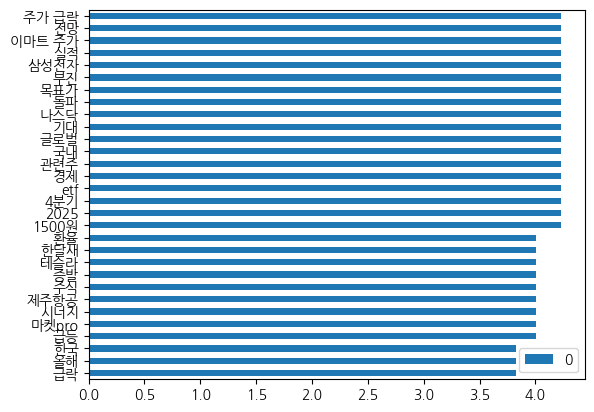

In [142]:
pd.Series(idf_dict).nsmallest(30).to_frame().plot.barh()

In [143]:
def display_word_cloud(dict, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate_from_frequencies(dict)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

{'급락': 5, '주식': 5, '올해': 5, '한국': 5, '증발': 4, '제주항공': 4, '테슬라': 4, '마켓pro': 4, '트럼프': 4, '급등': 4, '한달새': 4, '환율': 4, '시너지': 4, '전망': 3, '부진': 3, '글로벌': 3, '이마트 주가': 3, '돌파': 3, '삼성전자': 3, '주가 급락': 3, '주가는': 3, '나스닥': 3, '기대': 3, '목표가': 3, '1500원': 3, '실적': 3, '투자': 3, '국내': 3, '관련주': 3, '경제': 3, '4분기': 3, '2025': 3, 'etf': 3, '투자심리': 3, '윤현주의': 2, '원화값': 2, '원자재': 2, '한달새 2100': 2, '올들어': 2, '올해만': 2, '현대제철': 2, '폭락': 2, '오른다': 2, '연말': 2, '연금': 2, '알리와': 2, '알리': 2, '윤현주의 主食이': 2, '참사에': 2, '폭등': 2, '재테크': 2, '참사까지': 2, '조선': 2, '조선 금융주': 2, '조직개편': 2, '조직개편 실시': 2, '탄핵에': 2, '코스피 2400': 2, '초고수는 지금': 2, '초고수는': 2, '주식 초고수는': 2, '악재': 2, '지금': 2, '지마켓': 2, '트럼프 2기': 2, '수익률': 2, '아직': 2, '主食이': 2, '기업': 2, '기대감': 2, '금융주': 2, '국장': 2, '거래': 2, '개미들 환호': 2, '개미들': 2, '강화': 2, '主食이 주식': 2, 'nh': 2, '꽁꽁 투자심리': 2, 'k항공': 2, '4분기 실적': 2, '33': 2, '2기': 2, '2400선': 2, '2400': 2, '2100 폭등': 2, '2100': 2, '2025 재테크': 2, '꽁꽁': 2, '나스닥 33': 2, '실시': 2, '사모시장': 2, '실스크 한달새': 2, '실스크': 2, '시총': 2

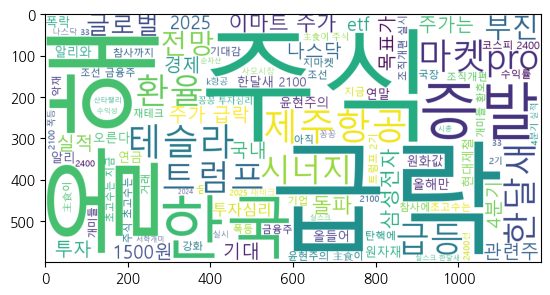

In [144]:
# CounterVectorizer로 분석한 어휘빈도 내림차순
dict = cvect_voca.to_dict()
print(dict)
display_word_cloud(dict,100)

{'올해': 3.240809687074421, '한국': 2.9004787521972846, '테슬라': 2.8172581791532623, '급락': 2.5825042847184982, '관련주': 2.5520422571842, '증발': 2.3344559133797964, '한달새': 2.2669972304018136, '시너지': 2.0852934860238217, '급등': 2.0663989537524157, '마켓pro': 2.064099900374111, '2400선': 2.0, '주가는': 1.9832125056578662, '투자': 1.9577160281368653, '제주항공': 1.9428843253468133, '부진': 1.8553228936198034, '1500원': 1.8466478924402936, '돌파': 1.835246362123137, '경제': 1.7877523096510402, '삼성전자': 1.7567948055008946, '트럼프': 1.7349058785697031, '산타랠리': 1.729972556523292, '실적': 1.7133984576880001, '주식': 1.7077428583039844, 'etf': 1.7038121627100016, '환율': 1.6964263223005371, '나스닥': 1.6333191794192246, '기대': 1.6288708740879483, '전망': 1.6225791975864958, '반도체': 1.5895970430230184, '내년': 1.5773502691896257, '2024': 1.5315000236928498, '단독': 1.527538926375625, '이마트 주가': 1.5229924138798165, '주가 급락': 1.5229924138798165, '기업': 1.5, '투자심리': 1.4975294910490096, '알리와': 1.478120975870725, '원자재': 1.4703513680513938, '4분기': 1.4394

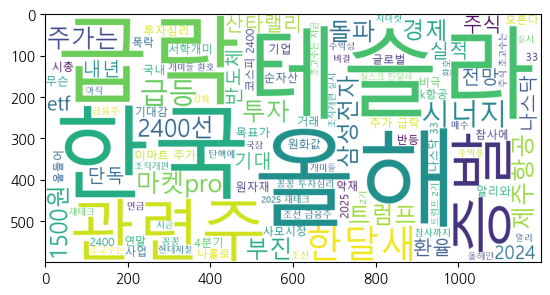

In [145]:
# TfidfVectorizer로 분석한 어휘중요도 내림차순
dict = tfidvect_voca.to_dict()
print(dict)
display_word_cloud(dict,100)